<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-Emmanuel-Dominguez-A01793683/blob/main/TecMty_Regresion_lineal_polinomial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ciencia y Analítica de Datos

Profesor: María de la Paz Rico

Fecha: 9/11/2022

**Actividad Semanal -- 7 Regresiones**

Emmanuel Dominguez Bravo A01793683

# Linear Models


In [10]:
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
# to make this notebook's output stable across runs
np.random.seed(42)

## Simple Linear Regression

Simple linear regression equation:

$y = ax + b$
<br>
$a$: slope
<br>
$b$: intercept

Generate linear-looking data with the equation:

$y = 3X + 4 + noise$

# Ejercicio 1

Utiliza la base de datos de 
https://www.kaggle.com/vinicius150987/manufacturing-cost

Suponga que trabaja como consultor de una empresa de nueva creación que busca desarrollar un modelo para estimar el costo de los bienes vendidos a medida que varían el volumen de producción (número de unidades producidas). La startup recopiló datos y le pidió que desarrollara un modelo para predecir su costo frente a la cantidad de unidades vendidas.

In [3]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/EconomiesOfScale.csv')
df.sample(10)

,Number of Units,Manufacturing Cost
521,4.518689,38.634483
737,5.284690,33.233497
740,5.292696,34.550609
660,5.030596,34.982985
411,4.182289,43.090662
678,5.077623,29.087582
626,4.925292,39.152161
513,4.483809,41.780157
859,5.853092,36.344797
136,3.049856,54.462176


In [4]:
X = df[['Manufacturing Cost']]
y = df['Number of Units']

In [5]:
X.shape

(1000, 1)

In [6]:
y.describe

<bound method NDFrame.describe of 0       1.000000
1       1.185994
2       1.191499
3       1.204771
4       1.298773
         ...    
995     8.099710
996     8.739752
997     8.780888
998     8.897700
999    10.000000
Name: Number of Units, Length: 1000, dtype: float64>

**Ejercicio 1. Costo en la industria de manufactura. Ahora realizaremos los ejercicios de regresión utilizando una parte para entrenar y otra para evaluar.**

a. Divide los datos del costo de manufactura. Utiliza la función train_test_split (viene el ejemplo al final del notebook).

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 3)

print(f'Numero total de registros en la bdd: {len(X)}')
print("*****"*10)
print(f'Numero total de registros en el training set: {len(X_train)}')
print(f'Tamaño de X_train: {X_train.shape}')
print("*****"*10)
print(f'Mumero total de registros en el test dataset: {len(X_test)}')
print(f'Tamaño del X_test: {X_test.shape}')

Numero total de registros en la bdd: 1000
**************************************************
Numero total de registros en el training set: 800
Tamaño de X_train: (800, 1)
**************************************************
Mumero total de registros en el test dataset: 200
Tamaño del X_test: (200, 1)


b. Regresión Lineal.
Realiza la regresión lineal: modelo generado (ecuación), su visualización, sus errores y r cuadrada.

In [8]:
X_train.describe()

,Manufacturing Cost
count,800.000000
mean,39.801758
std,10.346161
min,20.000000
25%,32.729693
50%,38.224781
75%,44.332729
max,98.777013


In [11]:
#lineal
linear_reg = LinearRegression(fit_intercept=True)
linear_reg.fit(X_train, y_train)

LinearRegression()

In [12]:
y_test

642    4.977296
762    5.379111
909    6.215400
199    3.333153
586    4.724777
         ...   
164    3.170540
782    5.473178
575    4.688092
992    7.974248
713    5.203777
Name: Number of Units, Length: 200, dtype: float64

In [13]:
y_pred = linear_reg.predict(X_test)

(0.0, 120.0, -2.5, 10.0)

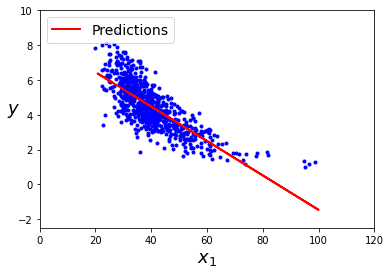

In [14]:
plt.plot(X_train, y_train, "b.")
plt.plot(X_test, y_pred, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 120, -2.5, 10])

In [15]:
linear_reg.coef_, linear_reg.intercept_

(array([-0.09903346]), 8.433867348371352)

Ecuación del modelo lineal:

$\hat{y} = -0.10X + 8.43$

In [16]:
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

print('Error medio Absoluto (MAE): %0.2f' %metrics.mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error: %0.2f' % np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('r2_score: %0.2f' % r2_score(y_test, y_pred))

Error medio Absoluto (MAE): 0.71
Root Mean Squared Error: 0.93
r2_score: 0.52


c. Regresión Polinomial.
Realiza la  regresión polinomial completa, tu modelo generado (ecuación), su visualización, sus errores y r cuadrada.

In [23]:
from sklearn.preprocessing import PolynomialFeatures

poly_feat = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_feat.fit_transform(X_train)

In [24]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y_train)
lin_reg.coef_, lin_reg.intercept_

(array([-0.20510362,  0.00110418]), 10.788384638352419)

Ecuación del modelo polinomial:

$y = a_0 + a_1x + a_2x^2$

$y = 10.788 - 0.21x + 0.001x^2$

In [25]:
X_new=np.linspace(0, 100, 200).reshape(200, 1)

In [27]:
from librosa.feature import poly_features

X_new_poly = poly_feat.fit_transform(X_new)
y_pred = lin_reg.predict(X_new_poly)


(0.0, 120.0, 0.0, 10.0)

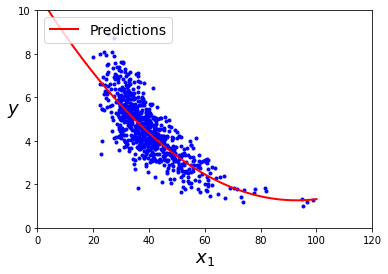

In [28]:
plt.plot(X_train, y_train, "b.")
plt.plot(X_new, y_pred, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 120, 0, 10])

In [29]:
print('Error medio Absoluto (MAE): %0.2f' %metrics.mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error: %0.2f' % np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('r2_score: %0.2f' % r2_score(y_test, y_pred))


Error medio Absoluto (MAE): 2.58
Root Mean Squared Error: 3.03
r2_score: -4.01


d. Realiza la regresión con Ridge y Lasso. Incluye la ecuación de tu modelo, errores y r cuadrada.

In [34]:
from sklearn.impute import SimpleImputer
from math import remainder
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge


In [32]:
model = Ridge(alpha=0.1, solver="cholesky")
model.fit(X_train, y_train)
model.intercept_, model.coef_ 


(8.433862739670946, array([-0.09903334]))

Ecuación del modelo Ridge:

$\hat{y} = -0.10X + 8.43$

In [36]:
X_new=np.linspace(0, 100, 200).reshape(200, 1)
y_pred = model.predict(X_new)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  "X does not have valid feature names, but"


In [37]:
print('Error medio Absoluto (MAE): %0.2f' %metrics.mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error: %0.2f' % np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('r2_score: %0.2f' % r2_score(y_test, y_pred))

Error medio Absoluto (MAE): 2.68
Root Mean Squared Error: 3.19
r2_score: -4.56


(0.0, 120.0, 0.0, 10.0)

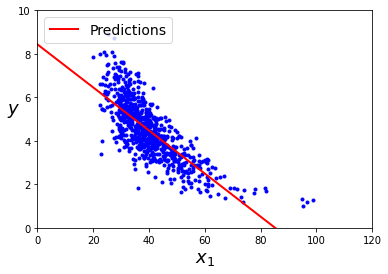

In [38]:
plt.plot(X_train, y_train, "b.")
plt.plot(X_new, y_pred, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 120, 0, 10])

Repetimos el proceso con Lasso

In [40]:
from sklearn.linear_model import Lasso



In [41]:
model = Lasso(alpha=0.1)
model.fit(X_train, y_train)
model.intercept_, model.coef_ 

(8.396637863375485, array([-0.09809809]))

Ecuación del modelo Lasso:

$\hat{y} = -0.098X + 8.397$

In [42]:
X_new=np.linspace(0, 100, 200).reshape(200, 1)
y_pred = model.predict(X_new)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  "X does not have valid feature names, but"


In [43]:
print('Error medio Absoluto (MAE): %0.2f' %metrics.mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error: %0.2f' % np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('r2_score: %0.2f' % r2_score(y_test, y_pred))

Error medio Absoluto (MAE): 2.66
Root Mean Squared Error: 3.16
r2_score: -4.47


(0.0, 120.0, 0.0, 10.0)

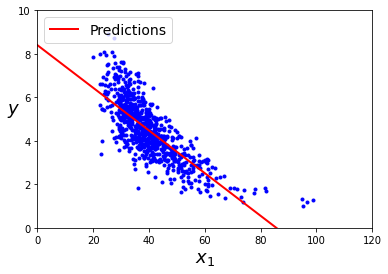

In [44]:
plt.plot(X_train, y_train, "b.")
plt.plot(X_new, y_pred, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 120, 0, 10])

Finalmente grafica :
MAE (de los cuatro métodos)
R2 (de los cuatro métodos)

Gráficas de error MAE

In [45]:
def getModels():
  modelos = list()
  nombres = list()

# Modelo de Regresión Lineal
  modelos.append(LinearRegression())
  nombres.append('Regresión Lineal')

# Modelo para Ridge
  modelos.append(Ridge())
  nombres.append('Ridge')

# Modelo para Lasso
  modelos.append(Lasso())
  nombres.append('Lasso')

  return modelos, nombres


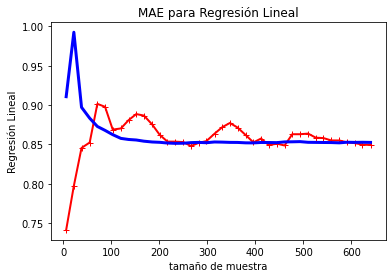

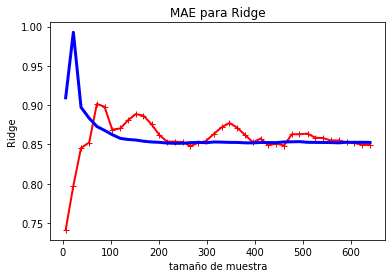

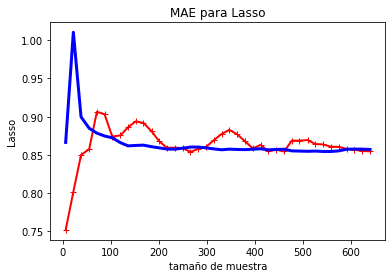

In [46]:
from sklearn.model_selection import learning_curve

modelos, nombres = getModels()
resultados = list()


for i in range(len(modelos)):
  train_sizes, train_scores, valid_scores = learning_curve(
      modelos[i], X_train, y_train, train_sizes=np.linspace(0.01, 1.0, 40), cv=5,
      scoring="neg_root_mean_squared_error")
  train_errors = -train_scores.mean(axis=1)
  valid_errors = -valid_scores.mean(axis=1)

  plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
  plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="valid")
  plt.title(f'MAE para {nombres[i]}')
  plt.xlabel('tamaño de muestra')
  plt.ylabel(nombres[i])
  plt.show()

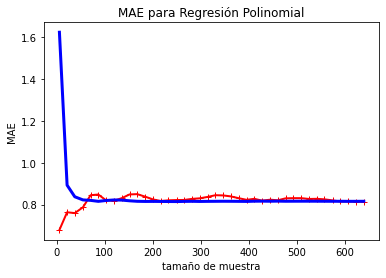

In [47]:
  # Modelo polinomial

train_sizes, train_scores, valid_scores = learning_curve(
    LinearRegression(), X_poly, y_train, train_sizes=np.linspace(0.01, 1.0, 40), cv=5,
    scoring="neg_root_mean_squared_error")
train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="valid")
plt.title('MAE para Regresión Polinomial')
plt.xlabel('tamaño de muestra')
plt.ylabel('MAE')
plt.show()

Gráfica de R^2

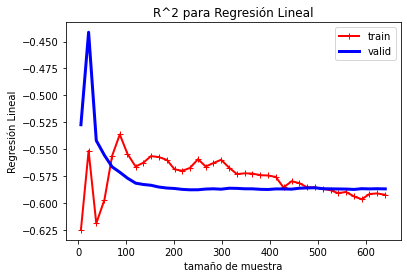

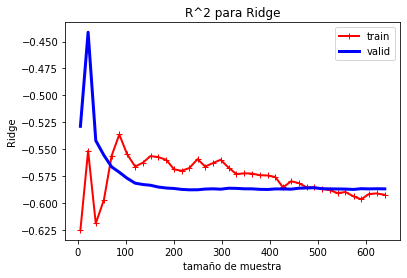

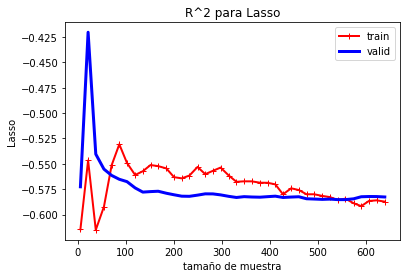

In [48]:
from sklearn.model_selection import learning_curve

modelos, nombres = getModels()
resultados = list()


for i in range(len(modelos)):
  train_sizes, train_scores, valid_scores = learning_curve(
      modelos[i], X_train, y_train, train_sizes=np.linspace(0.01, 1.0, 40), cv=5,
      scoring="r2")
  train_errors = -train_scores.mean(axis=1)
  valid_errors = -valid_scores.mean(axis=1)

  plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
  plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="valid")
  plt.title(f'R^2 para {nombres[i]}')
  plt.xlabel('tamaño de muestra')
  plt.ylabel(nombres[i])
  plt.legend(loc='best')
  plt.show()


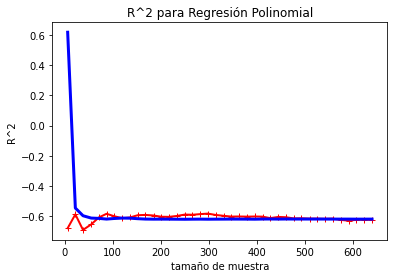

In [49]:
  # Modelo polinomial

train_sizes, train_scores, valid_scores = learning_curve(
    LinearRegression(), X_poly, y_train, train_sizes=np.linspace(0.01, 1.0, 40), cv=5,
    scoring="r2")
train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="valid")
plt.title('R^2 para Regresión Polinomial')
plt.xlabel('tamaño de muestra')
plt.ylabel('R^2')
plt.show()

#Ejercicio 2
Realiza la regresión polinomial de los siguientes datos:

In [50]:
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/kc_house_data.csv')
df.sample(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
6506,1560930050,20150325T000000,557500.0,3,2.00,2510,35255,1.0,0,2,...,9,2510,0,1994,0,98038,47.4012,-122.025,3140,36450
18426,6788201240,20150318T000000,1062500.0,4,2.75,1590,6000,1.5,0,0,...,8,1590,0,1925,0,98112,47.6401,-122.299,1590,4000
20488,8691440220,20150202T000000,1289990.0,5,4.00,4360,8030,2.0,0,0,...,10,4360,0,2015,0,98075,47.5923,-121.973,3570,6185
20294,301401410,20140722T000000,298000.0,3,2.50,1852,4000,2.0,0,0,...,7,1852,0,2014,0,98002,47.3455,-122.210,2166,4000
9881,1995200338,20141029T000000,738000.0,4,2.50,2830,5010,2.0,0,0,...,9,2170,660,2000,0,98115,47.6952,-122.327,1880,5739
9871,3856905185,20140624T000000,483000.0,2,1.75,1240,3000,1.5,0,0,...,7,1240,0,1906,0,98105,47.6689,-122.326,1800,4080
2710,5016002180,20140708T000000,780000.0,2,2.50,2560,2500,2.0,0,0,...,8,1690,870,1901,0,98112,47.6233,-122.300,1890,5000
10735,4443800505,20150507T000000,585000.0,3,1.50,1810,3880,1.5,0,0,...,8,1310,500,1929,0,98117,47.6835,-122.392,1400,3880
13903,3630060150,20150401T000000,550000.0,3,2.50,2080,2625,2.0,0,0,...,8,2080,0,2006,0,98029,47.5469,-121.997,1760,2772
10564,1921059045,20141107T000000,195000.0,2,1.00,1280,7861,1.0,0,0,...,6,1280,0,1913,0,98002,47.3007,-122.228,1020,6480


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [52]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [53]:
df.drop('id', axis = 1, inplace = True)
df.drop('date', axis = 1, inplace = True)
df.drop('zipcode', axis = 1, inplace = True)
df.drop('lat', axis = 1, inplace = True)
df.drop('long', axis = 1, inplace = True)


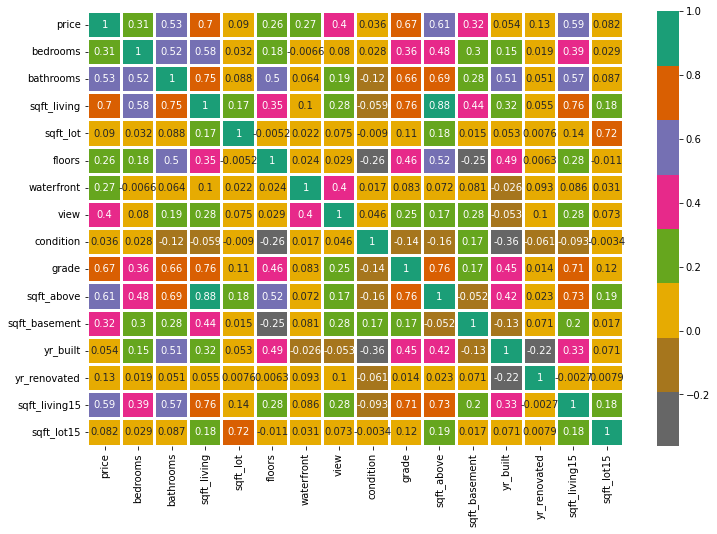

In [54]:
plt.figure(figsize=(12,8)) 
sns.heatmap(df.corr(), annot=True, cmap='Dark2_r', linewidths = 2)
plt.show()

In [55]:
columns = df.columns.drop('price')

features = columns
label = ['price']

X = df[features]
y = df[label]

In [56]:
X=df[['bathrooms', 'sqft_living', 'grade']]

Ejercicio 2. Regresión múltiple.

Encuentra el mejor regresor para los datos de las casas:

a. Divide los datos. Utiliza la función train_test_split (ya esta en el notebook).


In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 101)

print(f'Numero total de registros en la bdd: {len(X)}')
print("*****"*10)
print(f'Numero total de registros en el training set: {len(X_train)}')
print(f'Tamaño de X_train: {X_train.shape}')
print("*****"*10)
print(f'Mumero total de registros en el test dataset: {len(X_test)}')
print(f'Tamaño del X_test: {X_test.shape}')

Numero total de registros en la bdd: 21613
**************************************************
Numero total de registros en el training set: 17290
Tamaño de X_train: (17290, 3)
**************************************************
Mumero total de registros en el test dataset: 4323
Tamaño del X_test: (4323, 3)


b. Regresión Múltiple Lineal.


Realiza la regresión lineal: modelo generado (ecuación), sus errores y r cuadrada.


In [58]:

linear_reg = LinearRegression(fit_intercept=True)
linear_reg.fit(X_train, y_train)

LinearRegression()

In [59]:
linear_reg.coef_, linear_reg.intercept_

(array([[-41253.27951961,    203.34039384, 105804.39693117]]),
 array([-605139.14633053]))

Ecuación del modelo de regresión lineal múltiple:

$y = a_0 + a_1x_1 + a_2x_2 + a_3x_3$

$y = -605139.1463 - 41253.28x_1 + 203.34x_2 + 105804.40x_3$

In [60]:
y_pred = linear_reg.predict(X_test)

In [61]:
print('Error medio Absoluto (MAE): %0.2f' %metrics.mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error: %0.2f' % np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('r2_score: %0.2f' % r2_score(y_test, y_pred))

Error medio Absoluto (MAE): 161300.01
Root Mean Squared Error: 249473.56
r2_score: 0.54


c. Regresión Múltiple Polinomial.


Realiza la regresión polinomial completa, tu modelo generado (ecuación), sus errores y r cuadrada.


In [62]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X_train)

In [63]:
lin_reg = LinearRegression(fit_intercept=True)
lin_reg.fit(X_poly, y_train)
lin_reg.coef_, lin_reg.intercept_

(array([[-1.97692204e+05, -1.22529685e+02, -3.22848985e+04,
          2.82729772e+04, -3.11458788e+01,  1.66299051e+04,
          1.68979129e-02,  3.27313330e+01,  1.88167304e+03]]),
 array([443757.98420808]))

Ecuación del modelo de regresión polinomial múltiple

$\hat{y} = 443757.98 + -1.98x_1 - 1.23x_2^2 - 3.23x_3^3$...

In [64]:
X_poly_test = poly_features.fit_transform(X_test)

In [65]:
y_pred = lin_reg.predict(X_poly_test)

In [66]:
print('Error medio Absoluto (MAE): %0.2f' %metrics.mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error: %0.2f' % np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('r2_score: %0.2f' % r2_score(y_test, y_pred))

Error medio Absoluto (MAE): 149843.55
Root Mean Squared Error: 226161.19
r2_score: 0.63


f. Realiza la regresión con Ridge y Lasso. Incluye la ecuación de tu modelo, errores y r cuadrada.

In [67]:
model = Ridge(alpha=0.1, solver="cholesky")
model.fit(X_train, y_train)
model.intercept_, model.coef_ 


(array([-605133.24714532]),
 array([[-41251.96224322,    203.34075994, 105803.16268431]]))

Ecuación del modelo de regresión lineal múltiple Ridge:

$y = a_0 + a_1x_1 + a_2x_2 + a_3x_3$

$y = -605133.24 - 41251.96x_1 + 203.34x_2 + 105803.16x_3$

In [68]:
#X_new=np.linspace(0, 100, 200).reshape(200, 1)
y_pred = model.predict(X_test)

In [69]:
print('Error medio Absoluto (MAE): %0.2f' %metrics.mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error: %0.2f' % np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('r2_score: %0.2f' % r2_score(y_test, y_pred))

Error medio Absoluto (MAE): 161300.00
Root Mean Squared Error: 249473.52
r2_score: 0.54


In [70]:
model = Ridge(alpha=0.1)
model.fit(X_train, y_train)
model.intercept_, model.coef_ 

(array([-605133.24714532]),
 array([[-41251.96224322,    203.34075994, 105803.16268431]]))

Ecuación del modelo de regresión lineal múltiple Lasso:

$y = a_0 + a_1x_1 + a_2x_2 + a_3x_3$

$y = -605133.24 - 41251.96x_1 + 203.34x_2 + 105803.16x_3$

In [71]:
#X_new=np.linspace(0, 100, 200).reshape(200, 1)
y_pred = model.predict(X_test)

In [72]:
print('Error medio Absoluto (MAE): %0.2f' %metrics.mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error: %0.2f' % np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('r2_score: %0.2f' % r2_score(y_test, y_pred))

Error medio Absoluto (MAE): 161300.00
Root Mean Squared Error: 249473.52
r2_score: 0.54


h. Finalmente gráfica :
MAE (de los cuatro métodos)
R2 (de los cuatro métodos)


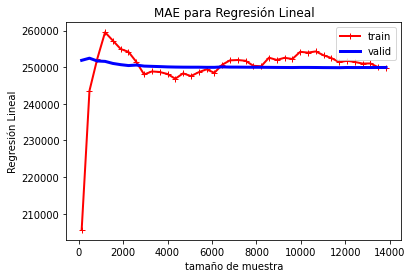

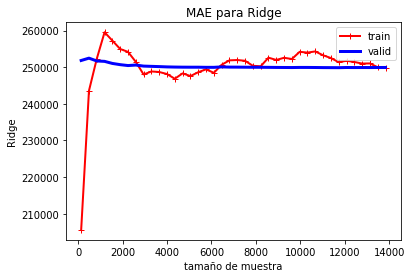

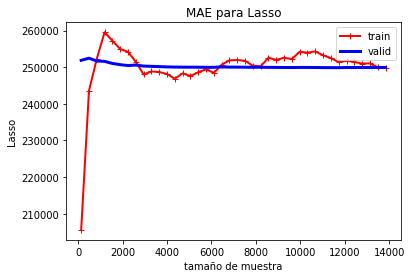

In [73]:
from sklearn.model_selection import learning_curve

modelos, nombres = getModels()
resultados = list()


for i in range(len(modelos)):
  train_sizes, train_scores, valid_scores = learning_curve(
      modelos[i], X_train, y_train, train_sizes=np.linspace(0.01, 1.0, 40), cv=5,
      scoring="neg_root_mean_squared_error")
  train_errors = -train_scores.mean(axis=1)
  valid_errors = -valid_scores.mean(axis=1)

  plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
  plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="valid")
  plt.title(f'MAE para {nombres[i]}')
  plt.xlabel('tamaño de muestra')
  plt.ylabel(nombres[i])
  plt.legend(loc='best')
  plt.show()

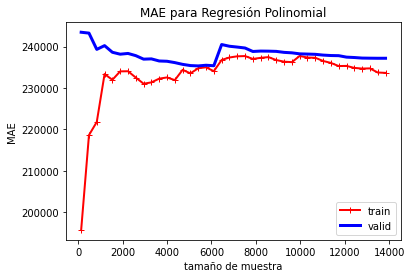

In [74]:
  # Modelo polinomial

train_sizes, train_scores, valid_scores = learning_curve(
    LinearRegression(), X_poly, y_train, train_sizes=np.linspace(0.01, 1.0, 40), cv=5,
    scoring="neg_root_mean_squared_error")
train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="valid")
plt.title('MAE para Regresión Polinomial')
plt.xlabel('tamaño de muestra')
plt.ylabel('MAE')
plt.legend(loc='best')
plt.show()

Gráficas de Error R^2

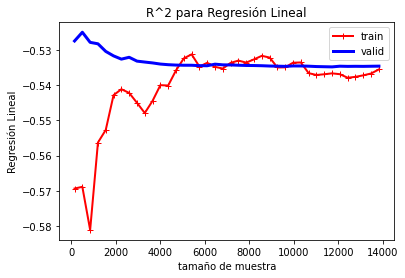

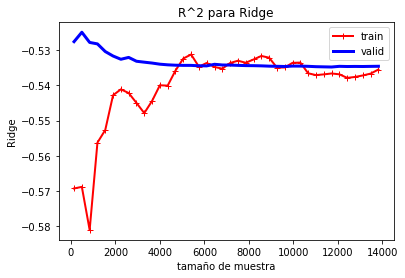

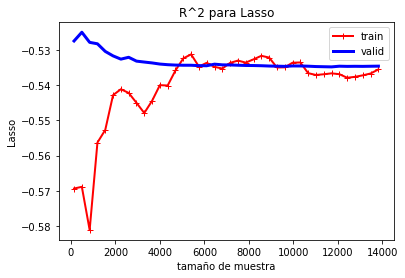

In [75]:
from sklearn.model_selection import learning_curve

modelos, nombres = getModels()
resultados = list()


for i in range(len(modelos)):
  train_sizes, train_scores, valid_scores = learning_curve(
      modelos[i], X_train, y_train, train_sizes=np.linspace(0.01, 1.0, 40), cv=5,
      scoring="r2")
  train_errors = -train_scores.mean(axis=1)
  valid_errors = -valid_scores.mean(axis=1)

  plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
  plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="valid")
  plt.title(f'R^2 para {nombres[i]}')
  plt.xlabel('tamaño de muestra')
  plt.ylabel(nombres[i])
  plt.legend(loc='best')
  plt.show()


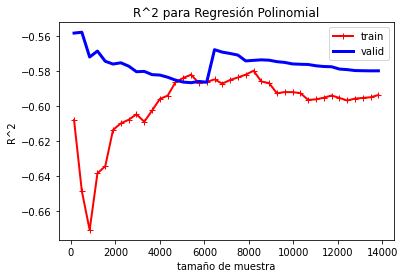

In [76]:
  # Modelo polinomial

train_sizes, train_scores, valid_scores = learning_curve(
    LinearRegression(), X_poly, y_train, train_sizes=np.linspace(0.01, 1.0, 40), cv=5,
    scoring="r2")
train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="valid")
plt.title('R^2 para Regresión Polinomial')
plt.xlabel('tamaño de muestra')
plt.legend(loc='best')
plt.ylabel('R^2')
plt.show()

i. Explica tus resultados, que método se aproxima mejor, ¿por qué?, ¿qué porcentajes de entrenamiento y evaluación usaste? ¿Que error tienes?, ¿es bueno?, ¿Cómo lo sabes?
Agrega las conclusiones

En base al MAE, considero que el mejor modelo fue el de regresión múltiple polinomial, ya que el error está en un rango de 230,000 a 240,000 USD, el cual considerando que de la mediana al tercer cuartil el precio de las casas va de 450,000 a 645,000 USD, no sería un error aceptable, sin embargo, los demás modelos tienen un error aún más alto por alrededor de 10,000 USD.